Carga y Exploracion del Dataset

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Cargar Imagenes

In [14]:
import pandas as pd

# Ruta del dataset (imágenes)
DATASET_PATH = r"C:\DAVID\CS\2025 0\machine_learning\Data_Proyect3\ISIC2018_Task3_Training_Input\ISIC2018_Task3_Training_Input"

# Ruta del archivo CSV con etiquetas
LABELS_FILE = r"C:\DAVID\CS\2025 0\machine_learning\Data_Proyect3\ISIC2018_Task3_Training_GroundTruth\ISIC2018_Task3_Training_GroundTruth\ISIC2018_Task3_Training_GroundTruth.csv"

# Cargar etiquetas en un DataFrame con el separador correcto
df = pd.read_csv(LABELS_FILE, sep=';')
# Eliminar columna innecesaria si existe
df = df.drop(columns=['Unnamed: 8'], errors='ignore')

# Verificar que ahora se cargó correctamente
print(df.head())  
print(df.dtypes)  

# Asegurar que todas las columnas después de 'image' sean numéricas
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Reemplazar valores NaN con 0 (en caso de errores en la conversión)
df.iloc[:, 1:] = df.iloc[:, 1:].fillna(0)

# Crear una nueva columna con el diagnóstico basado en One-Hot Encoding
df['diagnosis'] = df.iloc[:, 1:].idxmax(axis=1)



# Mostrar las primeras filas con la nueva columna de diagnóstico
print(df[['image', 'diagnosis']].head())

# Ver cuántas imágenes hay por categoría
print(df['diagnosis'].value_counts())


          image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0  ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1  ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2  ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3  ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4  ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0
image     object
MEL      float64
NV       float64
BCC      float64
AKIEC    float64
BKL      float64
DF       float64
VASC     float64
dtype: object
          image diagnosis
0  ISIC_0024306        NV
1  ISIC_0024307        NV
2  ISIC_0024308        NV
3  ISIC_0024309        NV
4  ISIC_0024310       MEL
diagnosis
NV       6705
MEL      1113
BKL      1099
BCC       514
AKIEC     327
VASC      142
DF        115
Name: count, dtype: int64


Mostrar imagenes aletorias del dataset

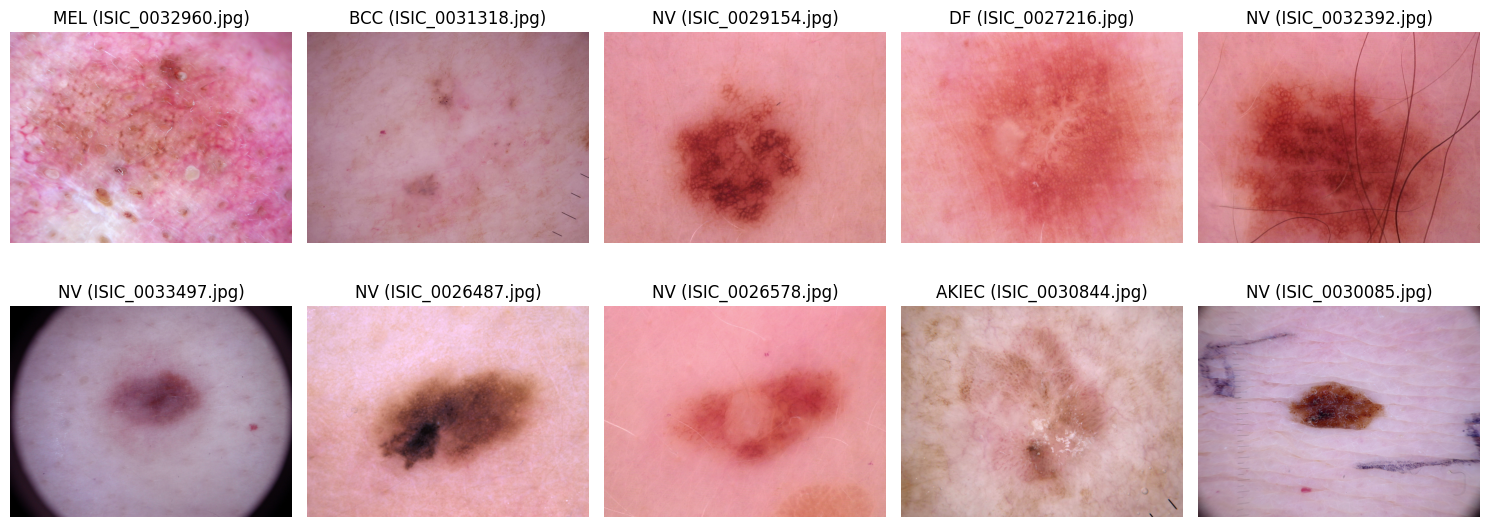

In [15]:
# Mostrar imágenes aleatorias de diferentes categorías
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    # Seleccionar una imagen aleatoria
    row = df.sample(1).iloc[0]
    image_name = row['image'] + ".jpg"
    label = row['diagnosis']

    # Cargar la imagen
    img_path = os.path.join(DATASET_PATH, image_name)
    image = cv2.imread(img_path)
    
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
        ax.imshow(image)
        ax.set_title(f"{label} ({image_name})")
    else:
        ax.set_title(f"Imagen no encontrada: {image_name}")

    ax.axis("off")

plt.tight_layout()
plt.show()
